In [73]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas import Grouper
from pandas.plotting import lag_plot
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:

# Importing the training set
dataset_2014 = pd.read_csv('Datasets/data.csv')

#Quarter 1
dataset_2015_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2015_Q1.csv')
dataset_2016_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2016_Q1.csv')
dataset_2017_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2017_Q1.csv')
dataset_2018_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2018_Q1.csv')

#Quarter 2 
dataset_2015_Q2 = pd.read_csv('Datasets/quarter2/Divvy_Trips_2015_Q2.csv')
dataset_2016_04  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_04.csv')
dataset_2016_05  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_05.csv')
dataset_2016_06  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_06.csv')
dataset_2016_Q2 = pd.concat([dataset_2016_04, dataset_2016_05, dataset_2016_06])
dataset_2017_Q2 = pd.read_csv('Datasets/quarter2/Divvy_Trips_2017_Q2.csv')
dataset_2018_Q2 = pd.read_csv('Datasets/quarter2/Divvy_Trips_2018_Q2.csv')

#Quarter 3 
dataset_2015_07  = pd.read_csv('Datasets/quarter3/Divvy_Trips_2015_07.csv')
dataset_2015_08  = pd.read_csv('Datasets/quarter3/Divvy_Trips_2015_08.csv')
dataset_2015_09  = pd.read_csv('Datasets/quarter3/Divvy_Trips_2015_09.csv')
dataset_2015_Q3 = pd.concat([dataset_2015_07, dataset_2015_08, dataset_2015_09])
dataset_2016_Q3 = pd.read_csv('Datasets/quarter3/Divvy_Trips_2016_Q3.csv')
dataset_2017_Q3 = pd.read_csv('Datasets/quarter3/Divvy_Trips_2017_Q3.csv')
dataset_2018_Q3 = pd.read_csv('Datasets/quarter3/Divvy_Trips_2018_Q3.csv')

#Quarter 4 
dataset_2015_Q4 = pd.read_csv('Datasets/quarter4/Divvy_Trips_2015_Q4.csv')
dataset_2016_Q4 = pd.read_csv('Datasets/quarter4/Divvy_Trips_2016_Q4.csv')
dataset_2017_Q4 = pd.read_csv('Datasets/quarter4/Divvy_Trips_2017_Q4.csv')
dataset_2018_Q4 = pd.read_csv('Datasets/quarter4/Divvy_Trips_2018_Q4.csv')



In [3]:
dataset_2014['starttime'] = pd.to_datetime(dataset_2014['starttime'],infer_datetime_format=True)
dataset_2014['stoptime'] = pd.to_datetime(dataset_2014['stoptime'],infer_datetime_format=True)

#Quarter 1
dataset_2015_Q1['starttime'] = pd.to_datetime(dataset_2015_Q1['starttime'],infer_datetime_format=True)
dataset_2015_Q1['stoptime'] = pd.to_datetime(dataset_2015_Q1['stoptime'],infer_datetime_format=True)

dataset_2016_Q1['starttime'] = pd.to_datetime(dataset_2016_Q1['starttime'],infer_datetime_format=True)
dataset_2016_Q1['stoptime'] = pd.to_datetime(dataset_2016_Q1['stoptime'],infer_datetime_format=True)

dataset_2017_Q1['starttime'] = pd.to_datetime(dataset_2017_Q1['starttime'],infer_datetime_format=True)
dataset_2017_Q1['stoptime'] = pd.to_datetime(dataset_2017_Q1['stoptime'],infer_datetime_format=True)

dataset_2018_Q1['starttime'] = pd.to_datetime(dataset_2018_Q1['starttime'],infer_datetime_format=True)
dataset_2018_Q1['stoptime'] = pd.to_datetime(dataset_2018_Q1['stoptime'],infer_datetime_format=True)

#Quarter 2
dataset_2015_Q2['starttime'] = pd.to_datetime(dataset_2015_Q2['starttime'],infer_datetime_format=True)
dataset_2015_Q2['stoptime']  = pd.to_datetime(dataset_2015_Q2['stoptime'],infer_datetime_format=True)

dataset_2016_Q2['starttime'] = pd.to_datetime(dataset_2016_Q2['starttime'],infer_datetime_format=True)
dataset_2016_Q2['stoptime']  = pd.to_datetime(dataset_2016_Q2['stoptime'],infer_datetime_format=True)

dataset_2017_Q2['starttime'] = pd.to_datetime(dataset_2017_Q2['starttime'],infer_datetime_format=True)
dataset_2017_Q2['stoptime']  = pd.to_datetime(dataset_2017_Q2['stoptime'],infer_datetime_format=True)

dataset_2018_Q2['starttime'] = pd.to_datetime(dataset_2018_Q2['starttime'],infer_datetime_format=True)
dataset_2018_Q2['stoptime']  = pd.to_datetime(dataset_2018_Q2['stoptime'],infer_datetime_format=True)

#Quarter 3
dataset_2015_Q3['starttime'] = pd.to_datetime(dataset_2015_Q3['starttime'],infer_datetime_format=True)
dataset_2015_Q3['stoptime']  = pd.to_datetime(dataset_2015_Q3['stoptime'],infer_datetime_format=True)

dataset_2016_Q3['starttime'] = pd.to_datetime(dataset_2016_Q3['starttime'],infer_datetime_format=True)
dataset_2016_Q3['stoptime']  = pd.to_datetime(dataset_2016_Q3['stoptime'],infer_datetime_format=True)

dataset_2017_Q3['starttime'] = pd.to_datetime(dataset_2017_Q3['starttime'],infer_datetime_format=True)
dataset_2017_Q3['stoptime']  = pd.to_datetime(dataset_2017_Q3['stoptime'],infer_datetime_format=True)

dataset_2018_Q3['starttime'] = pd.to_datetime(dataset_2018_Q3['starttime'],infer_datetime_format=True)
dataset_2018_Q3['stoptime']  = pd.to_datetime(dataset_2018_Q3['stoptime'],infer_datetime_format=True)

#Quarter 4
dataset_2015_Q4['starttime'] = pd.to_datetime(dataset_2015_Q4['starttime'],infer_datetime_format=True)
dataset_2015_Q4['stoptime']  = pd.to_datetime(dataset_2015_Q4['stoptime'],infer_datetime_format=True)

dataset_2016_Q4['starttime'] = pd.to_datetime(dataset_2016_Q4['starttime'],infer_datetime_format=True)
dataset_2016_Q4['stoptime']  = pd.to_datetime(dataset_2016_Q4['stoptime'],infer_datetime_format=True)

dataset_2017_Q4['starttime'] = pd.to_datetime(dataset_2017_Q4['starttime'],infer_datetime_format=True)
dataset_2017_Q4['stoptime']  = pd.to_datetime(dataset_2017_Q4['stoptime'],infer_datetime_format=True)

dataset_2018_Q4['starttime'] = pd.to_datetime(dataset_2018_Q4['starttime'],infer_datetime_format=True)
dataset_2018_Q4['stoptime']  = pd.to_datetime(dataset_2018_Q4['stoptime'],infer_datetime_format=True)

In [4]:
month_2014 = np.unique(dataset_2014['starttime'].dt.month)

#Quarter 1 
month_2015_Q1 = np.unique(dataset_2015_Q1['starttime'].dt.month) #1,2,3
month_2016_Q1 = np.unique(dataset_2016_Q1['starttime'].dt.month) #1,2,3
month_2017_Q1 = np.unique(dataset_2017_Q1['starttime'].dt.month) #1,2,3
month_2018_Q1 = np.unique(dataset_2018_Q1['starttime'].dt.month) #1,2,3

#Quarter 2 
month_2015_Q2 = np.unique(dataset_2015_Q2['starttime'].dt.month) #4,5,6
month_2016_Q2 = np.unique(dataset_2016_Q2['starttime'].dt.month) #4,5,6
month_2017_Q2 = np.unique(dataset_2017_Q2['starttime'].dt.month) #4,5,6
month_2018_Q2 = np.unique(dataset_2018_Q2['starttime'].dt.month) #4,5,6

#Quarter 3 
month_2015_Q3 = np.unique(dataset_2015_Q3['starttime'].dt.month) #7,8,9
month_2016_Q3 = np.unique(dataset_2016_Q3['starttime'].dt.month) #7,8,9
month_2017_Q3 = np.unique(dataset_2017_Q3['starttime'].dt.month) #7,8,9
month_2018_Q3 = np.unique(dataset_2018_Q3['starttime'].dt.month) #7,8

#Quarter 4 
month_2015_Q4 = np.unique(dataset_2015_Q4['starttime'].dt.month) #10,11,12
month_2016_Q4 = np.unique(dataset_2016_Q4['starttime'].dt.month) #10,11,12
month_2017_Q4 = np.unique(dataset_2017_Q4['starttime'].dt.month) #10,11,12
month_2018_Q4 = np.unique(dataset_2018_Q4['starttime'].dt.month) #10,11,12

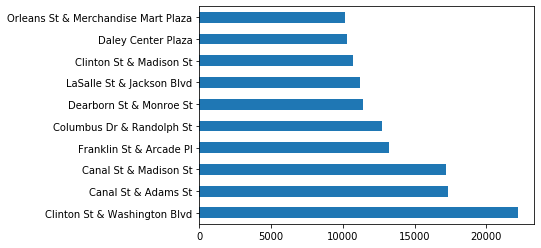

In [5]:
dataset_2014['from_station_name'].value_counts().nlargest(10).plot(kind="barh")

In [6]:
dataset_2018_Q4['from_station_name'].value_counts().nlargest(10)

Canal St & Adams St             11602
Clinton St & Madison St         11244
Clinton St & Washington Blvd    10334
Canal St & Madison St            7213
Kingsbury St & Kinzie St         6851
Columbus Dr & Randolph St        6840
Michigan Ave & Washington St     6810
Franklin St & Monroe St          6585
Daley Center Plaza               6556
LaSalle St & Jackson Blvd        5621
Name: from_station_name, dtype: int64

# Dataset 2015 (All Quarters)

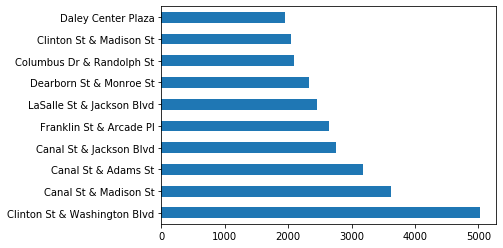

In [7]:
dataset_2015_Q1['from_station_name'].value_counts().nlargest(10).plot(kind="barh")

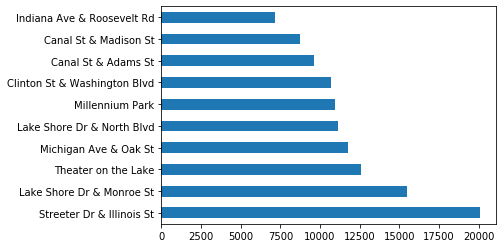

In [8]:
dataset_2015_Q2['from_station_name'].value_counts().nlargest(10).plot(kind="barh")

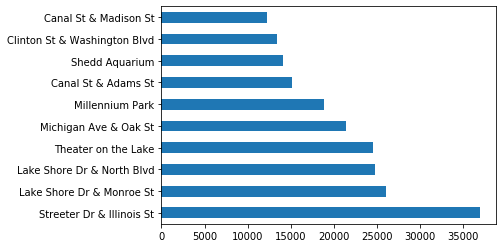

In [9]:
dataset_2015_Q3['from_station_name'].value_counts().nlargest(10).plot(kind="barh")

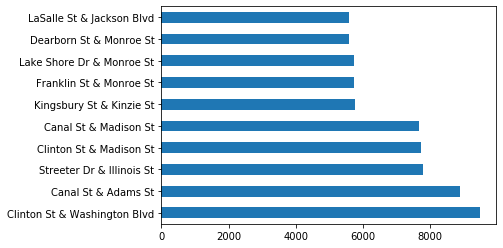

In [10]:
dataset_2015_Q4['from_station_name'].value_counts().nlargest(10).plot(kind="barh")

# Dataset 2016 All Quarters

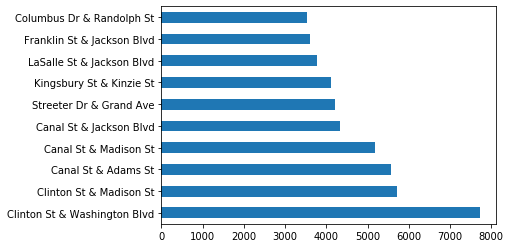

In [11]:
dataset_2016_Q1['from_station_name'].value_counts().nlargest(10).plot(kind="barh")

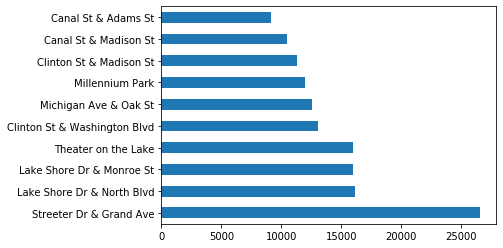

In [12]:
dataset_2016_Q2['from_station_name'].value_counts().nlargest(10).plot(kind="barh")

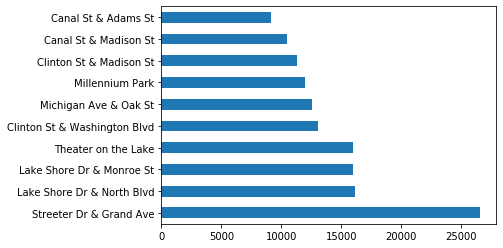

In [13]:
dataset_2016_Q2['from_station_name'].value_counts().nlargest(10).plot(kind="barh")

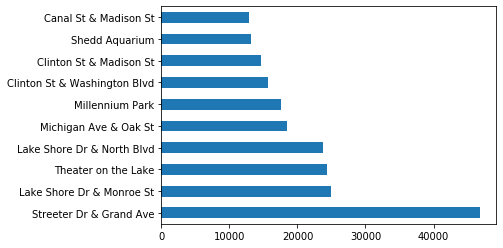

In [14]:
dataset_2016_Q3['from_station_name'].value_counts().nlargest(10).plot(kind="barh")

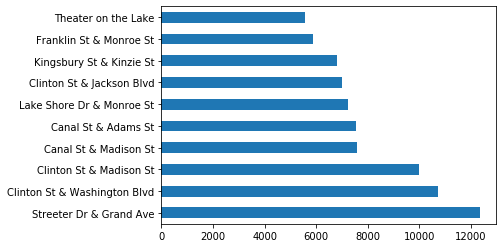

In [15]:
dataset_2016_Q4['from_station_name'].value_counts().nlargest(10).plot(kind="barh")


# Dataset 2017 (All Quarters )

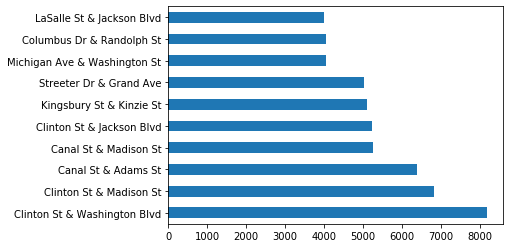

In [16]:
dataset_2017_Q1['from_station_name'].value_counts().nlargest(10).plot(kind="barh")

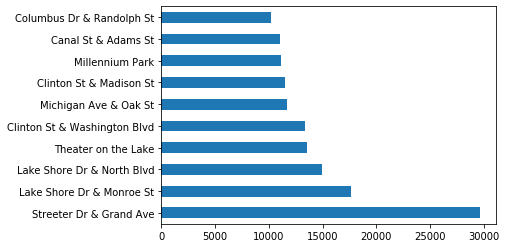

In [17]:
dataset_2017_Q2['from_station_name'].value_counts().nlargest(10).plot(kind="barh")

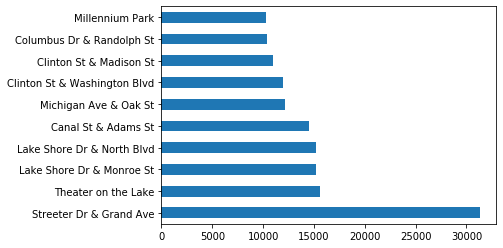

In [18]:
dataset_2017_Q3['from_station_name'].value_counts().nlargest(10).plot(kind="barh")

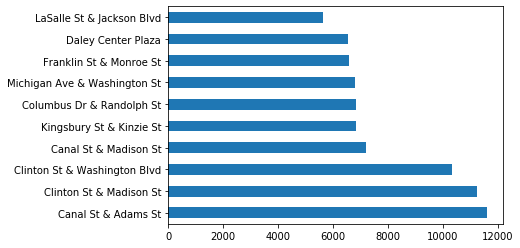

In [19]:
dataset_2018_Q4['from_station_name'].value_counts().nlargest(10).plot(kind="barh")

# Dataset 2018 (All Quarters)

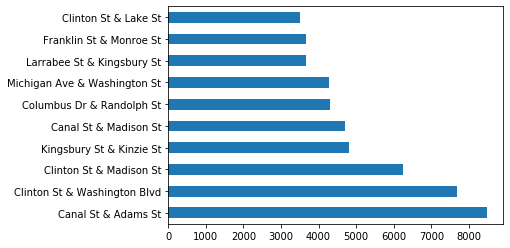

In [20]:
dataset_2018_Q1['from_station_name'].value_counts().nlargest(10).plot(kind="barh")

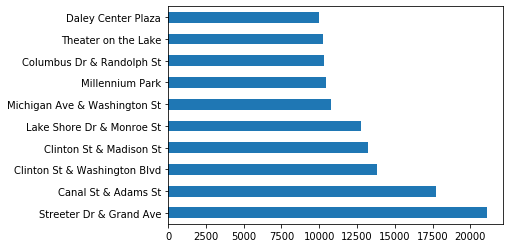

In [21]:
dataset_2018_Q2['from_station_name'].value_counts().nlargest(10).plot(kind="barh")

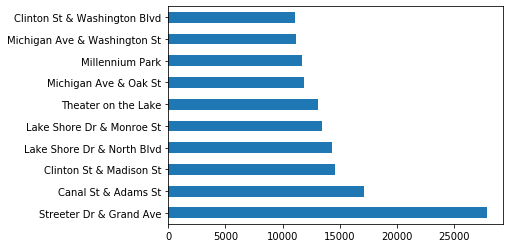

In [22]:
dataset_2018_Q3['from_station_name'].value_counts().nlargest(10).plot(kind="barh")

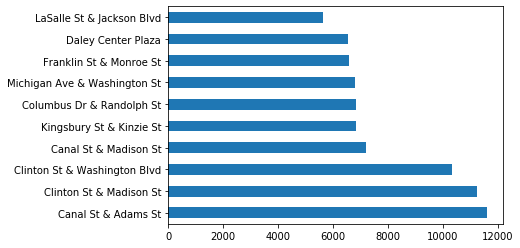

In [23]:
dataset_2018_Q4['from_station_name'].value_counts().nlargest(10).plot(kind="barh")

In [24]:
#Filter by Popular Station
filtereddata_2014 = dataset_2014[(dataset_2014.from_station_id==91)]
#Quarter 1 
filtereddata_2014_Q1 = filtereddata_2014[(filtereddata_2014['starttime'].dt.month<=3)]
filtereddata_2015_Q1 = dataset_2015_Q1[(dataset_2015_Q1.from_station_id==91)]
filtereddata_2016_Q1 = dataset_2016_Q1[(dataset_2016_Q1.from_station_id==91)]
filtereddata_2017_Q1 = dataset_2017_Q1[(dataset_2017_Q1.from_station_id==91)]
filtereddata_2018_Q1 = dataset_2018_Q1[(dataset_2018_Q1.from_station_id==91)]

#Quarter 2 
filtereddata_2014_Q2 = filtereddata_2014[(filtereddata_2014['starttime'].dt.month>3) & (filtereddata_2014['starttime'].dt.month<=6)]
filtereddata_2015_Q2 = dataset_2015_Q2[(dataset_2015_Q2.from_station_id==35)]
filtereddata_2016_Q2 = dataset_2016_Q2[(dataset_2016_Q2.from_station_id==35)]
filtereddata_2017_Q2 = dataset_2017_Q2[(dataset_2017_Q2.from_station_id==35)]
filtereddata_2018_Q2 = dataset_2018_Q2[(dataset_2018_Q2.from_station_id==35)]
#Quarter 3 
filtereddata_2014_Q3 = filtereddata_2014[(filtereddata_2014['starttime'].dt.month>6) & (filtereddata_2014['starttime'].dt.month<=9)]
filtereddata_2015_Q3 = dataset_2015_Q3[(dataset_2015_Q3.from_station_id==35)]
filtereddata_2016_Q3 = dataset_2016_Q3[(dataset_2016_Q3.from_station_id==35)]
filtereddata_2017_Q3 = dataset_2017_Q3[(dataset_2017_Q3.from_station_id==35)]
filtereddata_2018_Q3 = dataset_2018_Q3[(dataset_2018_Q3.from_station_id==35)]
#Quarter 4 
filtereddata_2015_Q4 = dataset_2015_Q4[(dataset_2015_Q4.from_station_id==91)]
filtereddata_2016_Q4 = dataset_2016_Q4[(dataset_2016_Q4.from_station_id==91)]
filtereddata_2017_Q4 = dataset_2017_Q4[(dataset_2017_Q4.from_station_id==91)]
filtereddata_2018_Q4 = dataset_2018_Q4[(dataset_2018_Q4.from_station_id==91)]

In [25]:
np.unique(filtereddata_2015_Q4['from_station_id'])

array([91], dtype=int64)

# Groupby date for popular start station 

In [26]:
summer = pd.concat([filtereddata_2015_Q3,filtereddata_2016_Q3])
traindata_summer = pd.concat([filtereddata_2015_Q3])
testdata_summer  = filtereddata_2016_Q3
sc  = pd.DataFrame(summer.groupby(summer['starttime'].dt.date).count()['trip_id'])
sc1 = pd.DataFrame(traindata_summer.groupby(traindata_summer['starttime'].dt.date).count()['trip_id'])
sc2 = pd.DataFrame(testdata_summer.groupby(testdata_summer['starttime'].dt.date).count()['trip_id'])
sc1.columns = ["checkout"]
sc2.columns= ["checkout"]

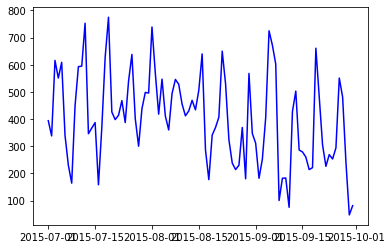

In [27]:
plt.plot(sc1.index,sc1.checkout,color='blue')


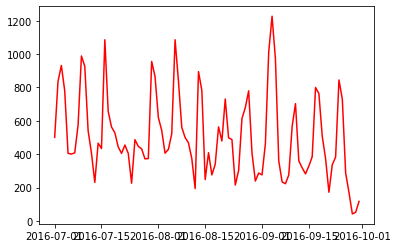

In [28]:
plt.plot(sc2.index,sc2.checkout,color='red')

# Group by Day 

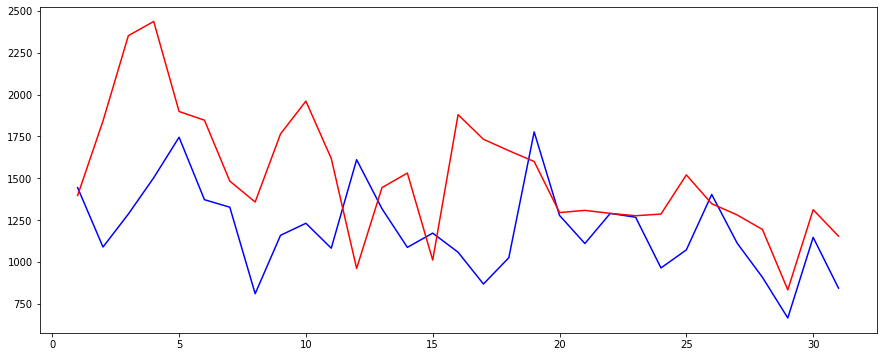

In [83]:
summer = pd.concat([filtereddata_2015_Q3,filtereddata_2016_Q3])
traindata_summer = pd.concat([filtereddata_2015_Q3])
testdata_summer  = filtereddata_2016_Q3
sc  = pd.DataFrame(summer.groupby(summer['starttime'].dt.day).count()['trip_id'])
sc1 = pd.DataFrame(traindata_summer.groupby(traindata_summer['starttime'].dt.day).count()['trip_id'])
sc2 = pd.DataFrame(testdata_summer.groupby(testdata_summer['starttime'].dt.day).count()['trip_id'])
sc1.columns = ["checkout"]
sc2.columns= ["checkout"]
plt.plot(sc1.index,sc1.checkout,color='blue')
plt.plot(sc2.index,sc2.checkout,color='red')

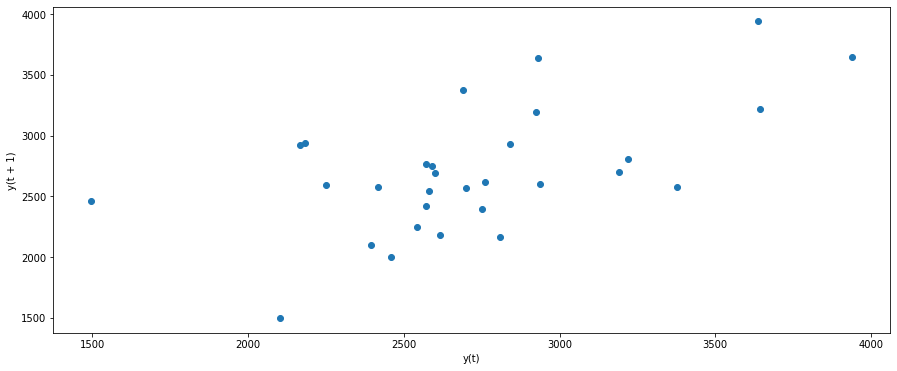

In [84]:
lag_plot(sc)
plt.show()

# Group by Hour Summer  Quarter 3

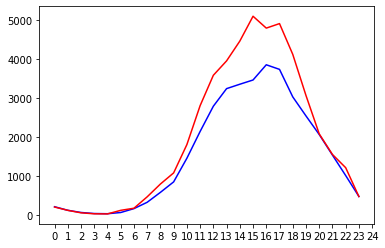

In [34]:
summer = pd.concat([filtereddata_2015_Q3,filtereddata_2016_Q3])
traindata_summer = pd.concat([filtereddata_2015_Q3])
testdata_summer  = filtereddata_2016_Q3
sc  = pd.DataFrame(summer.groupby(summer['starttime'].dt.hour).count()['trip_id'])
sc1 = pd.DataFrame(traindata_summer.groupby(traindata_summer['starttime'].dt.hour).count()['trip_id'])
sc2 = pd.DataFrame(testdata_summer.groupby(testdata_summer['starttime'].dt.hour).count()['trip_id'])
sc1.columns = ["checkout"]
sc2.columns= ["checkout"]
hour=[]
for i in range(0,25):
    hour.append(i)
plt.xticks(hour)
plt.plot(sc1.index,sc1.checkout,color='blue')
plt.plot(sc2.index,sc2.checkout,color='red')

# Group by Hour Winter Quarter 1

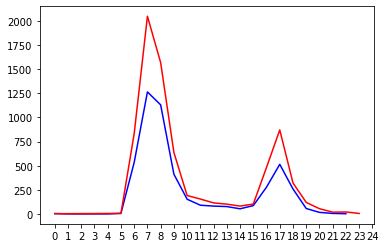

In [35]:
winter = pd.concat([filtereddata_2015_Q1,filtereddata_2016_Q1])
traindata_winter = pd.concat([filtereddata_2015_Q1])
testdata_winter  = filtereddata_2016_Q1
sc  = pd.DataFrame(winter.groupby(winter['starttime'].dt.hour).count()['trip_id'])
all_hour_train = pd.DataFrame(traindata_winter.groupby(traindata_winter['starttime'].dt.hour).count()['trip_id'])
all_hour_test = pd.DataFrame(testdata_winter.groupby(testdata_winter['starttime'].dt.hour).count()['trip_id'])
all_hour_train.columns = ["checkout"]
all_hour_test.columns= ["checkout"]
hour=[]
for i in range(0,25):
    hour.append(i)
plt.xticks(hour)
plt.plot(all_hour_train.index,all_hour_train.checkout,color='blue')
plt.plot(all_hour_test.index,all_hour_test.checkout,color='red')

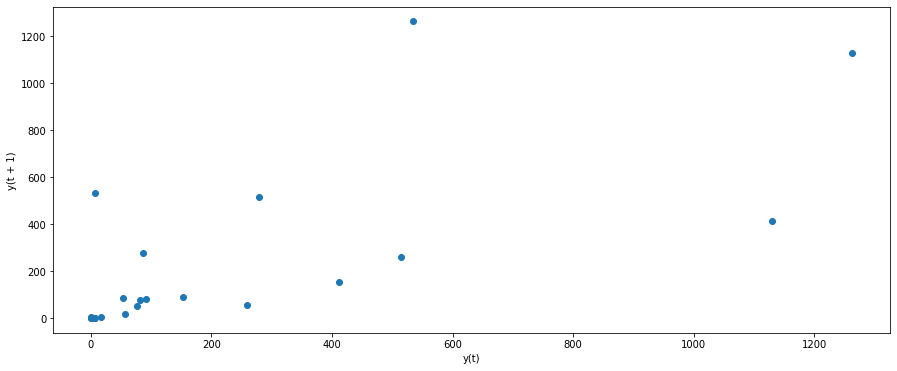

In [77]:
lag_plot(all_hour_train)
plt.show()

# Group by Hour Spring Quarter 2

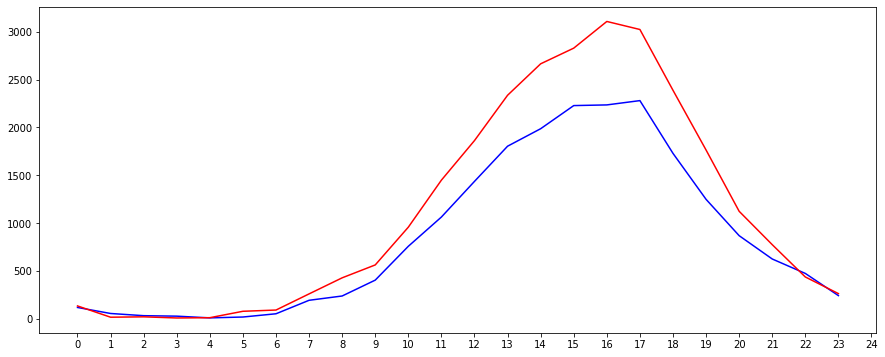

In [78]:
spring = pd.concat([filtereddata_2015_Q2,filtereddata_2016_Q2])
traindata_spring = pd.concat([filtereddata_2015_Q2])
testdata_spring  = filtereddata_2016_Q2
sc  = pd.DataFrame(spring.groupby(spring['starttime'].dt.hour).count()['trip_id'])
sc1 = pd.DataFrame(traindata_spring.groupby(traindata_spring['starttime'].dt.hour).count()['trip_id'])
sc2 = pd.DataFrame(testdata_spring.groupby(testdata_spring['starttime'].dt.hour).count()['trip_id'])
sc1.columns = ["checkout"]
sc2.columns= ["checkout"]
hour=[]
for i in range(0,25):
    hour.append(i)
plt.xticks(hour)
plt.plot(sc1.index,sc1.checkout,color='blue')
plt.plot(sc2.index,sc2.checkout,color='red')

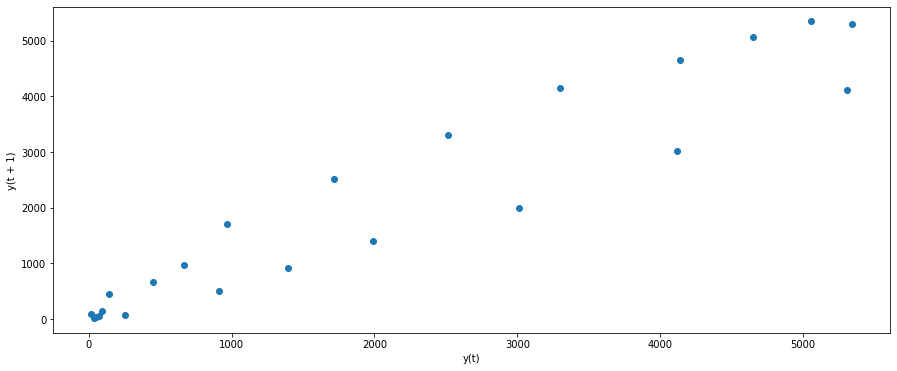

In [80]:
lag_plot(sc)
plt.show()

# Group by Hour Fall Quarter 4

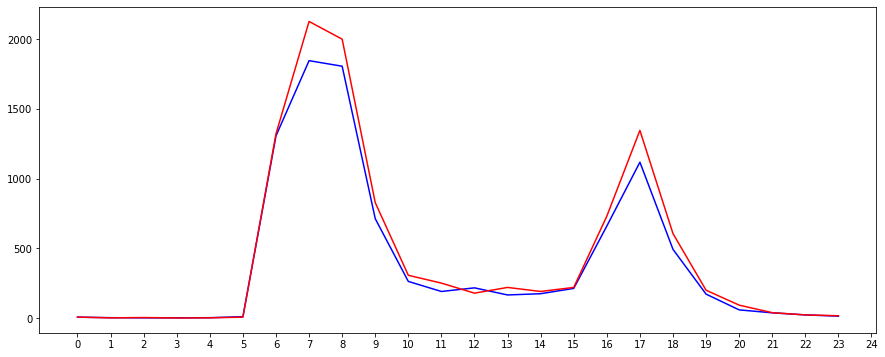

In [81]:
fall = pd.concat([filtereddata_2015_Q4,filtereddata_2016_Q4])
traindata_fall = pd.concat([filtereddata_2015_Q4])
testdata_fall  = filtereddata_2016_Q4
sc  = pd.DataFrame(fall.groupby(fall['starttime'].dt.hour).count()['trip_id'])
sc1 = pd.DataFrame(traindata_fall.groupby(traindata_fall['starttime'].dt.hour).count()['trip_id'])
sc2 = pd.DataFrame(testdata_fall.groupby(testdata_fall['starttime'].dt.hour).count()['trip_id'])
sc1.columns = ["checkout"]
sc2.columns= ["checkout"]
hour=[]
for i in range(0,25):
    hour.append(i)
plt.xticks(hour)
plt.plot(sc1.index,sc1.checkout,color='blue')
plt.plot(sc2.index,sc2.checkout,color='red')

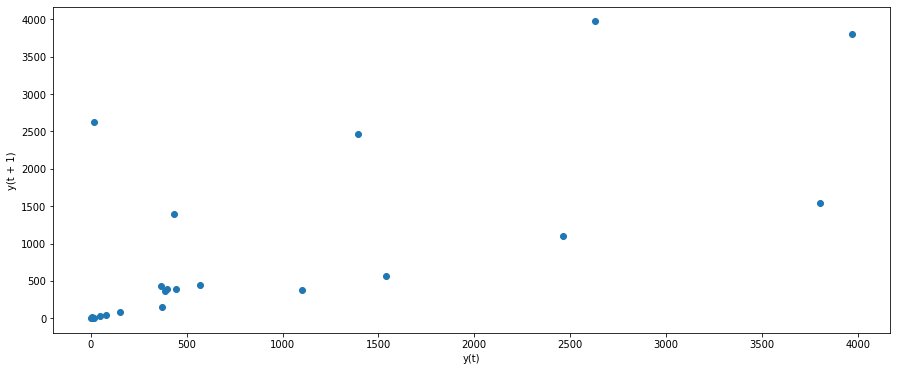

In [82]:
lag_plot(sc)
plt.show()

# Mean of 90 days 

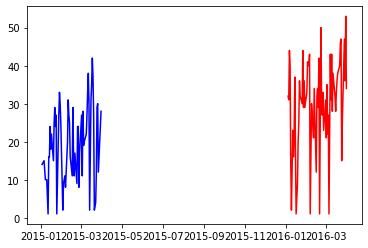

In [42]:
winter = pd.concat([filtereddata_2015_Q1,filtereddata_2016_Q1])
traindata_winter = pd.concat([filtereddata_2015_Q1])
testdata_winter  = filtereddata_2016_Q1
#sc  = pd.DataFrame(winter.groupby(winter['starttime'].dt.hour).count()['trip_id'])
peak_train = traindata_winter[traindata_winter['starttime'].dt.hour==7]
peak_test = testdata_winter[testdata_winter['starttime'].dt.hour==7]
final_train = pd.DataFrame(peak_train.groupby(peak_train['starttime'].dt.date).count()['trip_id'])
final_test = pd.DataFrame(peak_test.groupby(peak_test['starttime'].dt.date).count()['trip_id'])
final_train.columns = ["checkout"]
final_test.columns= ["checkout"]

plt.plot(final_train.index,final_train.checkout,color='blue')
plt.plot(final_test.index,final_test.checkout,color='red')

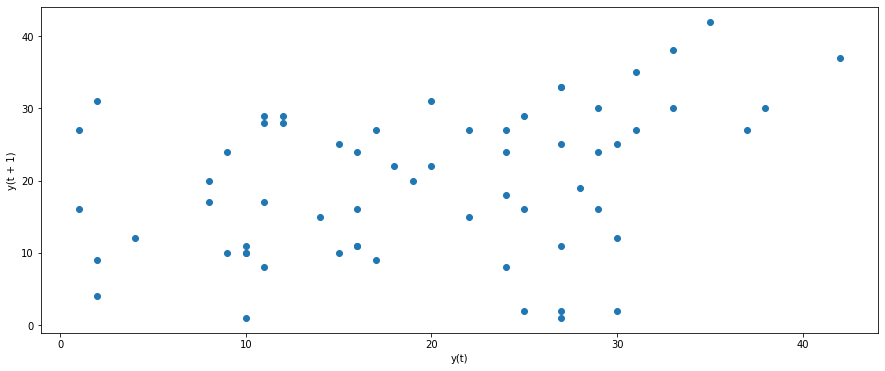

In [85]:
lag_plot(final_train)
plt.show()

# Quarter 3 PRediction 

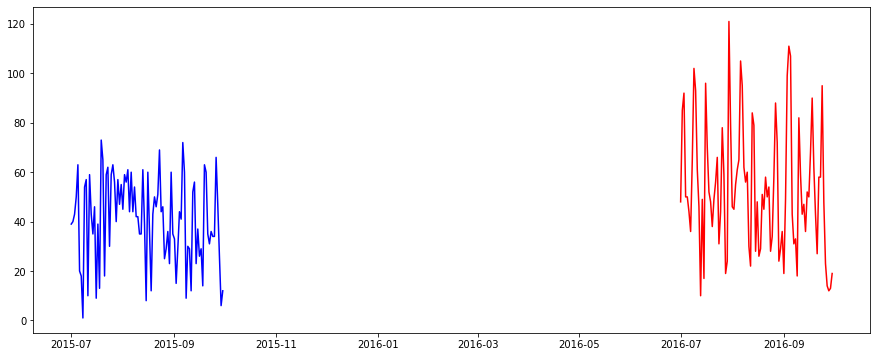

In [86]:
summer = pd.concat([filtereddata_2015_Q3,filtereddata_2016_Q3])
traindata_summer = pd.concat([filtereddata_2015_Q3])
testdata_summer  = filtereddata_2016_Q3
sc  = pd.DataFrame(summer.groupby(summer['starttime'].dt.hour).count()['trip_id'])
peak_train_summer = traindata_summer[traindata_summer['starttime'].dt.hour==17]
peak_test_summer = testdata_summer[testdata_summer['starttime'].dt.hour==17]
final_train_summer = pd.DataFrame(peak_train_summer.groupby(peak_train_summer['starttime'].dt.date).count()['trip_id'])
final_test_summer = pd.DataFrame(peak_test_summer.groupby(peak_test_summer['starttime'].dt.date).count()['trip_id'])
final_train_summer.columns = ["checkout"]
final_test_summer.columns= ["checkout"]

plt.plot(final_train_summer.index,final_train_summer.checkout,color='blue')
plt.plot(final_test_summer.index,final_test_summer.checkout,color='red')

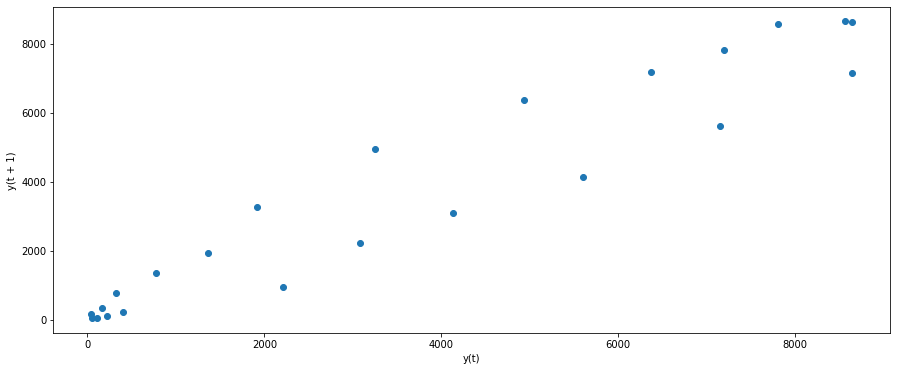

In [87]:
lag_plot(sc)
plt.show()

In [ ]:
teststa(final_train_summer)

# For all hour 

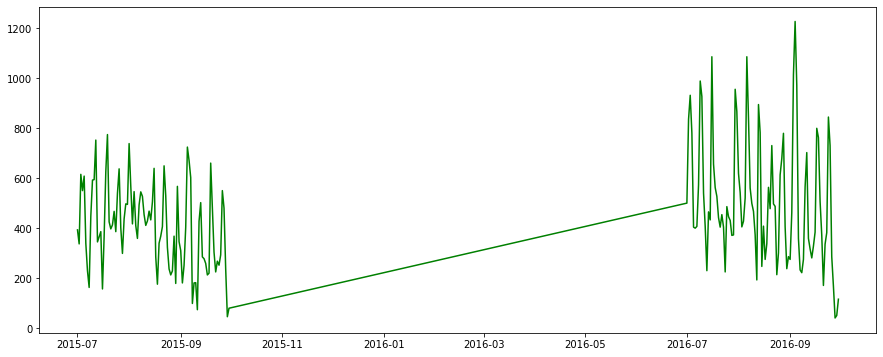

In [88]:
summer = pd.concat([filtereddata_2015_Q3,filtereddata_2016_Q3])
traindata_summer = pd.concat([filtereddata_2015_Q3])
testdata_summer  = filtereddata_2016_Q3
summer_whole  = pd.DataFrame(summer.groupby(summer['starttime'].dt.date).count()['trip_id'])
#peak_train_summer = traindata_summer[traindata_summer['starttime'].dt.hour==17]
#peak_test_summer = testdata_summer[testdata_summer['starttime'].dt.hour==17]
final_train_summer = pd.DataFrame(traindata_summer.groupby(traindata_summer['starttime'].dt.date).count()['trip_id'])
final_test_summer = pd.DataFrame(testdata_summer.groupby(testdata_summer['starttime'].dt.date).count()['trip_id'])
final_train_summer.columns = ["checkout"]
final_test_summer.columns= ["checkout"]
summer_whole.columns= ["checkout"]
plt.plot(summer_whole.index,summer_whole.checkout,color='green')
#plt.plot(final_train_summer.index,final_train_summer.checkout,color='blue')
#plt.plot(final_test_summer.index,final_test_summer.checkout,color='red')

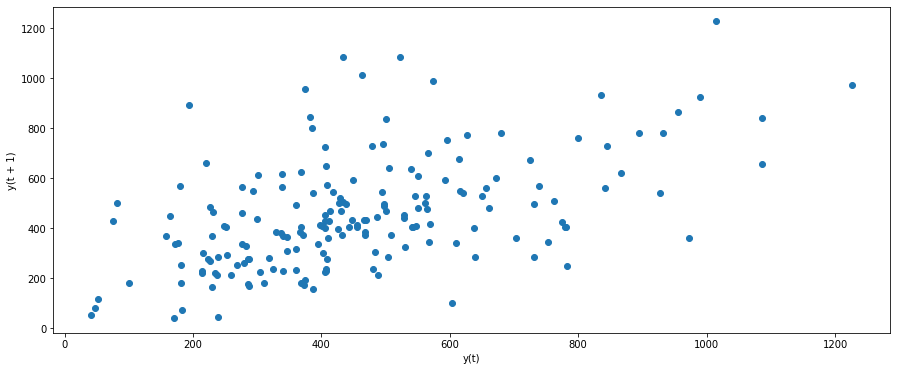

In [89]:
lag_plot(summer_whole)
plt.show()

In [92]:
#whole dataset(2015,2016,2017,2018)
dataset15to18 = pd.concat([dataset_2015_Q1,dataset_2016_Q1,dataset_2017_Q1,dataset_2018_Q1,dataset_2015_Q2,dataset_2016_Q2,dataset_2017_Q2,dataset_2018_Q2,dataset_2015_Q3,dataset_2016_Q3,dataset_2017_Q3,dataset_2018_Q3,dataset_2015_Q4,dataset_2016_Q4,dataset_2017_Q4,dataset_2018_Q4])

In [95]:
data_whole  = pd.DataFrame(dataset15to18.groupby(dataset15to18['starttime'].dt.date).count()['trip_id'])
data_whole.columns = ['checkout']

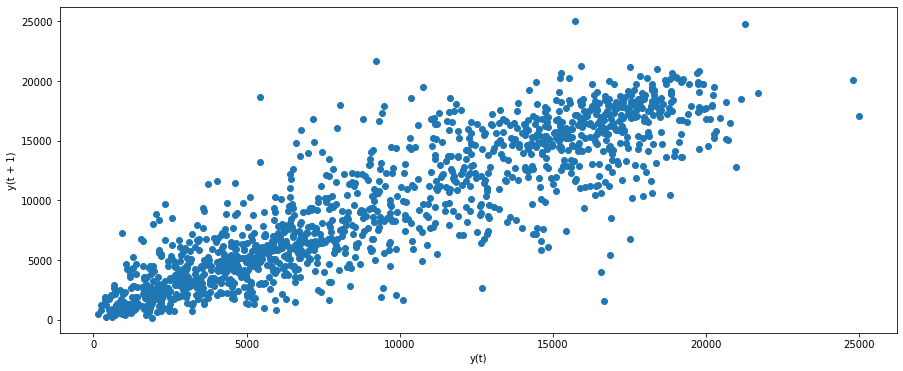

In [96]:
#LAg plot for whole dataset (year 2014,2015, 2016, 2018)
lag_plot(data_whole)
plt.show()

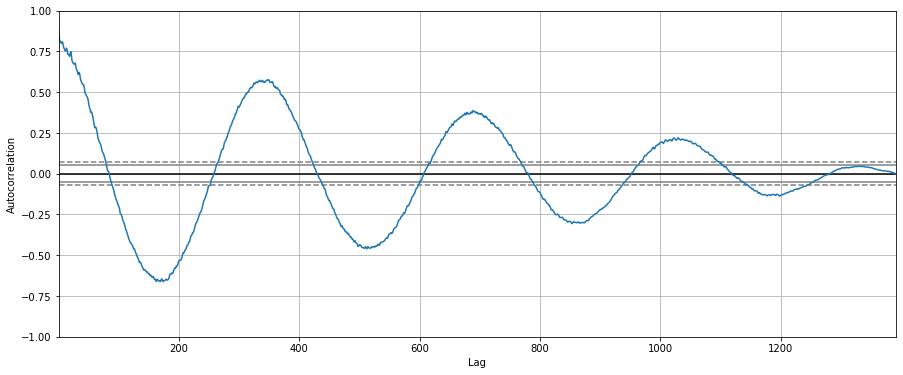

In [97]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_whole)
pyplot.show()

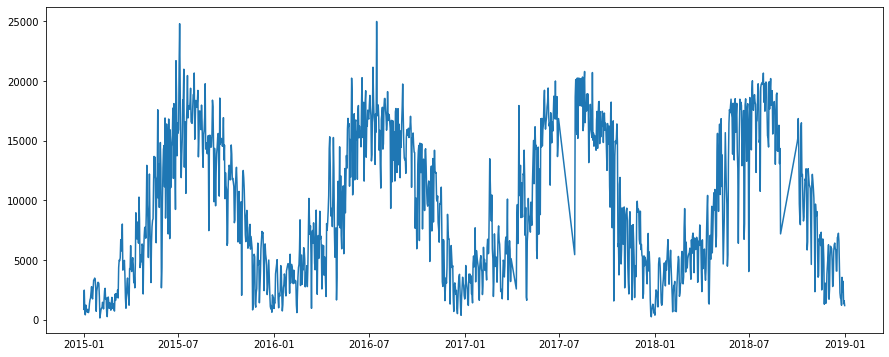

In [99]:
plt.plot(data_whole)

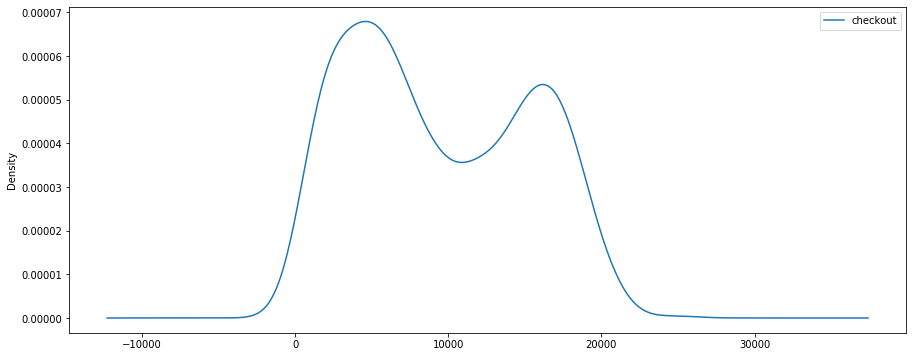

In [101]:
data_whole.plot(kind='kde')

2015         AxesSubplot(0.1,0.559091;0.363636x0.340909)
2016    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
2017             AxesSubplot(0.1,0.15;0.363636x0.340909)
2018        AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

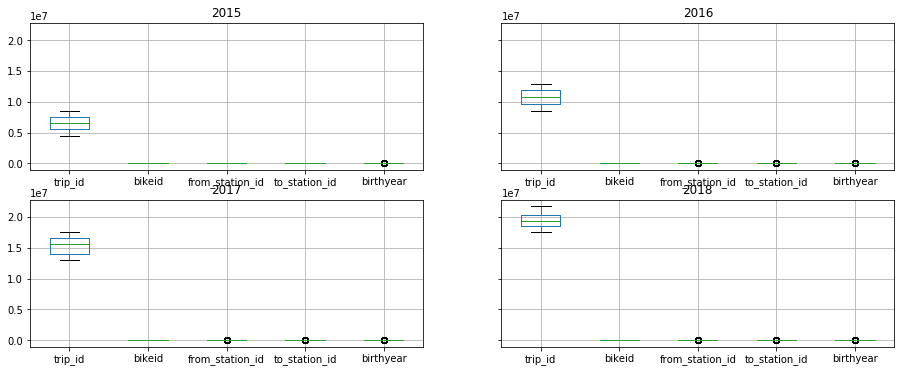

In [109]:
#Boxplot
groups = dataset15to18.groupby(dataset15to18['starttime'].dt.year)

groups.boxplot()
